In [40]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [41]:
import numpy as np
import pandas as pd

In [42]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [44]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [45]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [46]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [48]:
session = Session(engine)

# Exploratory Climate Analysis

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)


('2017-08-23',)
2016-08-23


In [53]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date > last_year).\
        order_by(Measurement.date).all()
print(precipitation)


[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.05), ('2016-08-31', 0.13), (

In [54]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation)
precipitation_df.head()


date  prcp
0  2016-08-24  0.08
1  2016-08-24  2.15
2  2016-08-24  2.28
3  2016-08-24   NaN
4  2016-08-24  1.22

In [59]:
# Sort the dataframe by date nad prcp

measure_records = []
for measure in precipitation:
    
    measure_records.append(measure._asdict())

    measurement_df = pd.DataFrame.from_records(measure_records)

    measurement_df = measurement_df.set_index('date')


    print(measurement_df)

            prcp
date            
2016-08-24  0.08
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.60
2016-08-28  2.07
2016-08-29  0.00
2016-08-29  0.17
2016-08-29  0.04
2016-08-29   NaN
2016-08-29  0.00
2016-08-29  0.35
2016-08-29  0.90
2016-08-30  0.00
2016-08-30  0.00
2016-08-30  0.02
2016-08-30  0.00
2016-08-30  0.00
2016-08-30  0.05
2016-08-31  0.13
2016-08-31  0.10
2016-08-31   NaN
2016-08-31   NaN
2016-08-31  0.25
2016-08-31  0.24
2016-08-31  2.46
2016-09-01  0.00
2016-09-01  0.00
2016-09-01  0.00
2016-09-01   NaN
2016-09-01  0.

[102 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-09-04  0.14
2016-09-04  0.44
2016-09-05   NaN
2016-09-05  0.11
2016-09-05   NaN
2016-09-05  0.02
2016-09-05  0.03
2016-09-05  0.18
2016-09-06   NaN
2016-09-06  0.05
2016-09-06  0.04
2016-09-06  0.03
2016-09-06  0.11
2016-09-06  1.00
2016-09-07  0.05
2016-09-07  0.10
2016-09-07  0.23
2016-09-07  0.11
2016-09-07  0.16
2016-09-07  1.35
2016-09-08  0.00
2016-09-08  0.22
2016-09-08  0.01
2016-09-08   NaN
2016-09-

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-09-12   NaN
2016-09-12   NaN
2016-09-12  0.15
2016-09-12  0.31
2016-09-12  1.04
2016-09-13  0.02
2016-09-13  0.37
2016-09-13  0.32
2016-09-13   NaN
2016-09-13  0.46
2016-09-13  0.34
2016-09-13  1.20
2016-09-14  1.32
2016-09-14  0.90
2016-09-14  1.84
2016-09-14   NaN
2016-09-14  1.19
2016-09-14  2.33
2016-09-14  6.70
2016-09-15  0.42
2016-09-15  0.12
2016-09-15  0.07
2016-09-15   NaN
2016-09-15  0.17
2016-09-15  0.83
2016-09-15  3.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-09-19  0.05
2016-09-19  0.01
2016-09-19  0.25
2016-09-20  0.00
2016-09-20  0.09
2016-09-20  0.25
2016-09-20  0.00
2016-09-20  0.04
2016-09-20  0.22
2016-09-20  0.43
2016-09-21  0.00
2016-09-21  0.06
2016-09-21  0.02
2016-09-21  0.00
2016-09-21  0.07
2016-09-21  1.02
2016-09-22  0.02
2016-09-22  0.09
2016-09-22  0.17
2016-09-22  0.06
2016-09-22  0.01
2016-09-22  0.34
2016-09-22  0.75
2016-09-23  0.00
2016-09-23  0.15
2016-09-23  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-09-26  0.06
2016-09-26  0.02
2016-09-26   NaN
2016-09-26  0.34
2016-09-26  0.17
2016-09-26  1.02
2016-09-27  0.02
2016-09-27  0.12
2016-09-27  0.00
2016-09-27  0.05
2016-09-27  0.17
2016-09-27  1.00
2016-09-28  0.00
2016-09-28  0.08
2016-09-28  0.00
2016-09-28  0.00
2016-09-28  0.00
2016-09-28  0.00
2016-09-28  0.05
2016-09-29  0.00
2016-09-29  0.49
2016-09-29  0.20
2016-09-29  0.04
2016-09-29  0.18
2016-09-29  0.59
2016-09-29  1.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-10-03  0.03
2016-10-03   NaN
2016-10-03  0.00
2016-10-03  0.16
2016-10-03  0.46
2016-10-04  0.00
2016-10-04  0.00
2016-10-04  0.00
2016-10-04   NaN
2016-10-04  0.00
2016-10-04  0.03
2016-10-04  3.46
2016-10-05  0.00
2016-10-05  0.00
2016-10-05  0.00
2016-10-05   NaN
2016-10-05  0.00
2016-10-05  0.01
2016-10-05  0.81
2016-10-06  0.00
2016-10-06  0.05
2016-10-06  0.00
2016-10-06  0.07
2016-10-06  0.00
2016-10-06  0.00
2016-10-06  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-10-08  0.00
2016-10-08  0.00
2016-10-08  0.00
2016-10-08  0.00
2016-10-08  0.04
2016-10-09  0.00
2016-10-09  0.00
2016-10-09  0.00
2016-10-09  0.00
2016-10-09  0.00
2016-10-10  0.00
2016-10-10  0.00
2016-10-10   NaN
2016-10-10  0.00
2016-10-10  0.00
2016-10-10  0.00
2016-10-11  0.00
2016-10-11  0.02
2016-10-11  0.04
2016-10-11   NaN
2016-10-11  0.00
2016-10-11  0.28
2016-10-11  0.35
2016-10-12  0.00
2016-10-12  0.03
2016-10-12  0.

[355 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-10-14  0.00
2016-10-14  0.00
2016-10-14  0.00
2016-10-14  0.00
2016-10-14  0.00
2016-10-15  0.00
2016-10-15  0.00
2016-10-15  0.02
2016-10-15  0.00
2016-10-15  0.04
2016-10-15  0.33
2016-10-16  0.00
2016-10-16  0.00
2016-10-16  0.00
2016-10-16  0.00
2016-10-16  0.00
2016-10-17  0.01
2016-10-17  0.03
2016-10-17   NaN
2016-10-17   NaN
2016-10-17  0.12
2016-10-17  0.01
2016-10-17  0.38
2016-10-18  0.00
2016-10-

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-10-20  0.00
2016-10-20  0.00
2016-10-20  0.01
2016-10-20   NaN
2016-10-20  0.00
2016-10-20  1.00
2016-10-21  0.05
2016-10-21  0.15
2016-10-21  0.03
2016-10-21   NaN
2016-10-21   NaN
2016-10-21  0.00
2016-10-21  0.09
2016-10-22  0.15
2016-10-22  0.10
2016-10-22  0.00
2016-10-22  0.15
2016-10-22  1.37
2016-10-23  0.01
2016-10-23  0.01
2016-10-23   NaN
2016-10-23  0.00
2016-10-23  0.02
2016-10-23  0.24
2016-10-24  0.00
2016-10-24  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-10-26  0.00
2016-10-26  0.06
2016-10-26  0.20
2016-10-26  0.02
2016-10-26  0.01
2016-10-26  0.00
2016-10-27  0.00
2016-10-27  0.11
2016-10-27  0.20
2016-10-27   NaN
2016-10-27  0.08
2016-10-27  0.22
2016-10-27  1.25
2016-10-28  0.00
2016-10-28  0.02
2016-10-28  0.07
2016-10-28   NaN
2016-10-28  0.06
2016-10-28  0.05
2016-10-28  0.37
2016-10-29  0.00
2016-10-29  0.02
2016-10-29  0.26
2016-10-29  0.01
2016-10-29  0.10
2016-10-29  0.

[470 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-11-01  0.01
2016-11-01  0.00
2016-11-01  0.01
2016-11-01  0.10
2016-11-01  0.09
2016-11-02  0.00
2016-11-02  0.00
2016-11-02  0.00
2016-11-02  0.00
2016-11-02  0.00
2016-11-02  0.04
2016-11-03  0.00
2016-11-03  0.00
2016-11-03  0.00
2016-11-03  0.00
2016-11-03  0.00
2016-11-03  0.02
2016-11-04  0.00
2016-11-04  0.00
2016-11-04  0.00
2016-11-04   NaN
2016-11-04  0.00
2016-11-04  0.00
2016-11-04  0.06
2016-11-

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-11-07  0.00
2016-11-07  0.00
2016-11-07  0.05
2016-11-08  0.07
2016-11-08  0.14
2016-11-08  0.02
2016-11-08  0.15
2016-11-08  0.21
2016-11-08  0.53
2016-11-09  0.00
2016-11-09  0.08
2016-11-09  0.17
2016-11-09  0.00
2016-11-09  0.00
2016-11-09  0.11
2016-11-09  0.04
2016-11-10  0.00
2016-11-10  0.00
2016-11-10  0.00
2016-11-10  0.00
2016-11-10  0.00
2016-11-10  0.01
2016-11-11  0.00
2016-11-11  0.00
2016-11-11  0.00
2016-11-11  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-11-13  0.00
2016-11-14  0.00
2016-11-14  0.06
2016-11-14  0.05
2016-11-14  0.02
2016-11-14  0.00
2016-11-14  0.00
2016-11-14  0.02
2016-11-15  0.00
2016-11-15  0.00
2016-11-15  0.00
2016-11-15   NaN
2016-11-15  0.00
2016-11-15  0.00
2016-11-15  0.05
2016-11-16  0.00
2016-11-16  0.14
2016-11-16  0.18
2016-11-16   NaN
2016-11-16  0.07
2016-11-16  0.24
2016-11-16  0.91
2016-11-17  0.00
2016-11-17  0.03
2016-11-17  0.00
2016-11-17   N

[586 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-11-19  0.11
2016-11-20  0.05
2016-11-20  0.11
2016-11-20  0.40
2016-11-20  0.39
2016-11-20   NaN
2016-11-21  0.01
2016-11-21  0.02
2016-11-21   NaN
2016-11-21  0.07
2016-11-21  0.11
2016-11-21  2.87
2016-11-22  0.13
2016-11-22  0.41
2016-11-22   NaN
2016-11-22   NaN
2016-11-22  0.31
2016-11-22  2.05
2016-11-22  2.11
2016-11-23  0.14
2016-11-23  0.03
2016-11-23   NaN
2016-11-23  0.03
2016-11-23  0.25
2016-11-

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-11-26  0.05
2016-11-26  0.05
2016-11-26  0.02
2016-11-26  0.03
2016-11-26  0.06
2016-11-26  0.30
2016-11-27  0.00
2016-11-27  0.06
2016-11-27  0.03
2016-11-27  0.00
2016-11-27  0.17
2016-11-27  0.29
2016-11-28  0.01
2016-11-28  0.02
2016-11-28  0.00
2016-11-28   NaN
2016-11-28  0.00
2016-11-28  0.00
2016-11-28  0.69
2016-11-29  0.00
2016-11-29  0.04
2016-11-29  0.04
2016-11-29   NaN
2016-11-29  0.06
2016-11-29  0.09
2016-11-29  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-12-01   NaN
2016-12-01  0.16
2016-12-01  0.37
2016-12-01  0.72
2016-12-02  0.03
2016-12-02  0.30
2016-12-02  0.40
2016-12-02   NaN
2016-12-02  0.01
2016-12-02  0.35
2016-12-02  1.27
2016-12-03  0.00
2016-12-03  0.04
2016-12-03  0.26
2016-12-03  0.02
2016-12-03  0.77
2016-12-03  1.62
2016-12-04  0.03
2016-12-04  0.10
2016-12-04  0.00
2016-12-04  0.32
2016-12-04  0.04
2016-12-04  0.31
2016-12-05  0.43
2016-12-05  0.34
2016-12-05  0.

[699 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-12-07  0.12
2016-12-07  0.02
2016-12-08  0.03
2016-12-08  0.03
2016-12-08  0.02
2016-12-08  0.27
2016-12-08  0.01
2016-12-08  0.07
2016-12-08  0.03
2016-12-09  0.52
2016-12-09  0.34
2016-12-09  0.26
2016-12-09   NaN
2016-12-09  0.31
2016-12-09  0.42
2016-12-10  0.05
2016-12-10  0.02
2016-12-10  0.00
2016-12-10   NaN
2016-12-10  0.02
2016-12-10  0.04
2016-12-11  0.04
2016-12-11  0.02
2016-12-11  0.06
2016-12-

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-12-13  0.15
2016-12-13  0.04
2016-12-13  0.09
2016-12-14  0.03
2016-12-14  0.05
2016-12-14  0.12
2016-12-14   NaN
2016-12-14  0.05
2016-12-14  0.92
2016-12-14  0.33
2016-12-15  0.00
2016-12-15  0.02
2016-12-15  0.07
2016-12-15   NaN
2016-12-15  0.00
2016-12-15  0.14
2016-12-15  0.03
2016-12-16  0.00
2016-12-16  0.01
2016-12-16  0.00
2016-12-16   NaN
2016-12-16  0.00
2016-12-16  0.03
2016-12-16  0.00
2016-12-17  0.01
2016-12-17  0.

[776 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-12-19  0.03
2016-12-19  0.15
2016-12-20  0.00
2016-12-20  0.02
2016-12-20  0.00
2016-12-20   NaN
2016-12-20  0.01
2016-12-20  0.00
2016-12-20  0.00
2016-12-21  0.00
2016-12-21  0.03
2016-12-21  0.09
2016-12-21  0.06
2016-12-21  0.06
2016-12-21  0.11
2016-12-21  0.55
2016-12-22  0.01
2016-12-22  0.17
2016-12-22  0.05
2016-12-22   NaN
2016-12-22  0.14
2016-12-22  0.86
2016-12-22  1.24
2016-12-23  0.01
2016-12-

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-12-25  0.02
2016-12-25  0.38
2016-12-26  0.02
2016-12-26  0.26
2016-12-26   NaN
2016-12-26  0.06
2016-12-26  0.22
2016-12-26  1.48
2016-12-27  0.00
2016-12-27  0.03
2016-12-27  0.02
2016-12-27  0.00
2016-12-27  0.05
2016-12-27  0.14
2016-12-28  0.02
2016-12-28  0.09
2016-12-28  0.01
2016-12-28   NaN
2016-12-28  0.06
2016-12-28  0.09
2016-12-28  0.14
2016-12-29  0.04
2016-12-29  0.18
2016-12-29  0.56
2016-12-29   NaN
2016-12-29  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2016-12-31  0.36
2016-12-31  0.25
2016-12-31  0.90
2017-01-01  0.00
2017-01-01  0.29
2017-01-01  0.00
2017-01-01   NaN
2017-01-01  0.03
2017-01-01  0.03
2017-01-02  0.00
2017-01-02  0.00
2017-01-02  0.01
2017-01-02  0.01
2017-01-02  0.00
2017-01-03  0.00
2017-01-03  0.00
2017-01-03  0.00
2017-01-03   NaN
2017-01-03  0.00
2017-01-03  0.00
2017-01-04  0.00
2017-01-04  0.00
2017-01-04  0.00
2017-01-04  0.18
2017-01-04  0.00
2017-01-04  0.

[896 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-01-08  0.00
2017-01-08  0.00
2017-01-08  0.03
2017-01-08  0.00
2017-01-08  0.00
2017-01-08  0.03
2017-01-09  0.00
2017-01-09  0.00
2017-01-09  0.00
2017-01-09   NaN
2017-01-09  0.00
2017-01-09  0.00
2017-01-09  0.00
2017-01-10  0.00
2017-01-10  0.00
2017-01-10  0.00
2017-01-10   NaN
2017-01-10  0.00
2017-01-10  0.00
2017-01-10  0.00
2017-01-11  0.00
2017-01-11  0.00
2017-01-11  0.00
2017-01-11   NaN
2017-01-

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-01-14  0.00
2017-01-14  0.01
2017-01-14  0.00
2017-01-15  0.00
2017-01-15  0.00
2017-01-15   NaN
2017-01-15  0.00
2017-01-15  0.01
2017-01-16  0.00
2017-01-16  0.00
2017-01-16   NaN
2017-01-16  0.00
2017-01-16  0.00
2017-01-16  0.00
2017-01-17  0.00
2017-01-17  0.00
2017-01-17  0.00
2017-01-17  0.00
2017-01-17  0.00
2017-01-17  0.00
2017-01-18  0.00
2017-01-18  0.00
2017-01-18  0.00
2017-01-18  0.00
2017-01-18   NaN
2017-01-18  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-01-20  0.00
2017-01-21  0.00
2017-01-21  0.04
2017-01-21  0.02
2017-01-21  0.11
2017-01-21  0.03
2017-01-21  0.08
2017-01-22  0.16
2017-01-22  0.01
2017-01-22  0.04
2017-01-22  0.09
2017-01-22  0.72
2017-01-23  0.00
2017-01-23  0.08
2017-01-23   NaN
2017-01-23   NaN
2017-01-23  0.00
2017-01-23  0.01
2017-01-23  0.85
2017-01-24  0.04
2017-01-24  0.15
2017-01-24   NaN
2017-01-24  0.08
2017-01-24  0.13
2017-01-24  1.85
2017-01-25  0.

[1013 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-01-26  0.00
2017-01-26  0.10
2017-01-27  0.00
2017-01-27  0.00
2017-01-27  0.00
2017-01-27  0.00
2017-01-27  0.00
2017-01-27  0.03
2017-01-27  0.03
2017-01-28  0.00
2017-01-28  0.14
2017-01-28  0.00
2017-01-28  0.00
2017-01-28  0.00
2017-01-29  0.18
2017-01-29  0.00
2017-01-29   NaN
2017-01-29  0.26
2017-01-29  0.55
2017-01-30  0.00
2017-01-30  0.00
2017-01-30   NaN
2017-01-30  0.05
2017-01-30  0.00
2017-01

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-02-01  0.00
2017-02-01  0.00
2017-02-01  0.00
2017-02-01  0.00
2017-02-02  0.00
2017-02-02  0.00
2017-02-02  0.00
2017-02-02  0.00
2017-02-02  0.00
2017-02-02  0.00
2017-02-02  0.00
2017-02-03  0.00
2017-02-03  0.00
2017-02-03  0.00
2017-02-03  0.00
2017-02-03  0.00
2017-02-03  0.00
2017-02-04  0.00
2017-02-04  0.00
2017-02-04  0.00
2017-02-04  0.00
2017-02-04   NaN
2017-02-05  0.00
2017-02-05  0.00
2017-02-05   NaN
2017-02-05  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-02-07  0.90
2017-02-07  0.00
2017-02-07  1.80
2017-02-07  1.32
2017-02-07  1.79
2017-02-08  0.00
2017-02-08  1.08
2017-02-08  0.00
2017-02-08  0.00
2017-02-08  0.00
2017-02-08  0.00
2017-02-08  0.00
2017-02-09  0.00
2017-02-09  0.02
2017-02-09  0.00
2017-02-09  0.00
2017-02-09  0.00
2017-02-09  0.00
2017-02-09  0.00
2017-02-10  0.00
2017-02-10  0.00
2017-02-10  0.00
2017-02-10  0.00
2017-02-10  0.00
2017-02-10  0.00
2017-02-10  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-02-12  1.83
2017-02-13  0.01
2017-02-13  2.90
2017-02-13  0.00
2017-02-13   NaN
2017-02-13  0.00
2017-02-13  0.01
2017-02-13  0.00
2017-02-14  0.00
2017-02-14  0.00
2017-02-14  0.00
2017-02-14  0.00
2017-02-14  0.00
2017-02-14  0.01
2017-02-15  0.00
2017-02-15  0.00
2017-02-15  0.00
2017-02-15   NaN
2017-02-15   NaN
2017-02-15  0.01
2017-02-15  0.07
2017-02-16  0.07
2017-02-16  0.00
2017-02-16  0.62
2017-02-16   NaN
2017-02-16  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-02-18  0.00
2017-02-18   NaN
2017-02-19  0.00
2017-02-19  0.00
2017-02-19  0.09
2017-02-19  0.10
2017-02-20  0.00
2017-02-20  0.00
2017-02-20   NaN
2017-02-20   NaN
2017-02-20  0.00
2017-02-20  0.00
2017-02-21  0.06
2017-02-21  0.00
2017-02-21  0.00
2017-02-21   NaN
2017-02-21  0.00
2017-02-21  0.07
2017-02-22  0.06
2017-02-22  0.06
2017-02-22  0.11
2017-02-22  0.17
2017-02-22  0.13
2017-02-22  0.06
2017-02-22  0.32
2017-02-23  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-02-24  0.00
2017-02-24  0.00
2017-02-25  0.03
2017-02-25  0.00
2017-02-25  0.00
2017-02-25  0.12
2017-02-26  0.00
2017-02-26  0.00
2017-02-26   NaN
2017-02-26   NaN
2017-02-26  0.00
2017-02-26  0.00
2017-02-27  0.00
2017-02-27  0.00
2017-02-27  0.00
2017-02-27   NaN
2017-02-27  0.00
2017-02-27  0.00
2017-02-27  0.00
2017-02-28  0.00
2017-02-28  0.16
2017-02-28  0.04
2017-02-28   NaN
2017-02-28  0.00
2017-02-28  0.04
2017-02-28  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-03-02  1.88
2017-03-02  0.58
2017-03-03  0.47
2017-03-03  0.54
2017-03-03   NaN
2017-03-03  0.14
2017-03-03  0.25
2017-03-03  0.27
2017-03-03  0.56
2017-03-04  0.00
2017-03-04  0.00
2017-03-04  0.00
2017-03-04  0.00
2017-03-04  0.00
2017-03-05  0.35
2017-03-05  0.10
2017-03-05  0.41
2017-03-05  0.35
2017-03-06  0.00
2017-03-06  0.51
2017-03-06   NaN
2017-03-06   NaN
2017-03-06   NaN
2017-03-06  0.03
2017-03-06  0.00
2017-03-07  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-03-09  0.80
2017-03-09  0.50
2017-03-09  0.00
2017-03-09   NaN
2017-03-09  0.65
2017-03-09  0.01
2017-03-10  0.00
2017-03-10  0.13
2017-03-10  0.13
2017-03-10  0.00
2017-03-10  0.00
2017-03-10  0.03
2017-03-10  0.00
2017-03-11  0.00
2017-03-11  0.03
2017-03-11  0.00
2017-03-11  0.01
2017-03-11  0.00
2017-03-12  0.00
2017-03-12  0.00
2017-03-12   NaN
2017-03-12  0.00
2017-03-12  0.00
2017-03-13  0.00
2017-03-13  0.00
2017-03-13  0.

[1307 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-03-14  0.00
2017-03-14  0.00
2017-03-15  0.00
2017-03-15  0.00
2017-03-15  0.00
2017-03-15  0.00
2017-03-15  0.06
2017-03-15  0.00
2017-03-16  0.00
2017-03-16  0.00
2017-03-16   NaN
2017-03-16   NaN
2017-03-16  0.00
2017-03-16  0.00
2017-03-16  0.00
2017-03-17  0.00
2017-03-17  0.19
2017-03-17  0.06
2017-03-17   NaN
2017-03-17  0.35
2017-03-17  0.12
2017-03-18  0.00
2017-03-18  0.00
2017-03-18  0.00
2017-03

[1343 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-03-20  0.02
2017-03-20  0.00
2017-03-21  0.00
2017-03-21  0.00
2017-03-21  0.00
2017-03-21  0.00
2017-03-21  0.09
2017-03-21  0.00
2017-03-22  0.00
2017-03-22  0.00
2017-03-22  0.00
2017-03-22  0.00
2017-03-22  0.00
2017-03-22  0.00
2017-03-23  0.00
2017-03-23  0.00
2017-03-23  0.00
2017-03-23  0.02
2017-03-23  0.00
2017-03-23  0.03
2017-03-24  0.02
2017-03-24  0.60
2017-03-24  0.15
2017-03-24  0.07
2017-03

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-03-25  0.48
2017-03-26  0.00
2017-03-26  0.00
2017-03-26  0.00
2017-03-26  0.00
2017-03-26  0.00
2017-03-27  0.00
2017-03-27  0.00
2017-03-27   NaN
2017-03-27  0.00
2017-03-27  0.01
2017-03-27  0.00
2017-03-28  0.00
2017-03-28  0.03
2017-03-28  0.00
2017-03-28   NaN
2017-03-28  0.00
2017-03-28  0.00
2017-03-28  0.68
2017-03-29  0.00
2017-03-29  0.00
2017-03-29  0.03
2017-03-29   NaN
2017-03-29  0.08
2017-03-29  0.01
2017-03-29  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-03-30   NaN
2017-03-30  0.00
2017-03-30  0.04
2017-03-31  0.00
2017-03-31  0.00
2017-03-31  0.00
2017-03-31  0.00
2017-03-31  0.00
2017-03-31  0.01
2017-03-31   NaN
2017-04-01  0.00
2017-04-01  0.00
2017-04-01  0.00
2017-04-01  0.00
2017-04-01  0.21
2017-04-01  0.20
2017-04-02  0.00
2017-04-02  0.00
2017-04-02  0.00
2017-04-02  0.00
2017-04-02  0.00
2017-04-02  0.00
2017-04-03  0.00
2017-04-03  0.08
2017-04-03  0.09
2017-04-03   N

[1434 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-04-04  0.00
2017-04-04  0.00
2017-04-04  0.09
2017-04-04  0.02
2017-04-05  0.00
2017-04-05  0.04
2017-04-05  0.07
2017-04-05  0.00
2017-04-05  0.00
2017-04-05  0.10
2017-04-05  0.45
2017-04-06  0.00
2017-04-06  0.00
2017-04-06  0.00
2017-04-06  0.00
2017-04-06  0.00
2017-04-06  0.06
2017-04-06  0.00
2017-04-07  0.00
2017-04-07  0.00
2017-04-07  0.00
2017-04-07  0.00
2017-04-07  0.00
2017-04-07  0.00
2017-04

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-04-09  0.00
2017-04-09  0.00
2017-04-09   NaN
2017-04-09   NaN
2017-04-09  0.00
2017-04-09  0.00
2017-04-10  0.00
2017-04-10  0.01
2017-04-10  0.00
2017-04-10   NaN
2017-04-10  0.00
2017-04-10  0.01
2017-04-10  0.00
2017-04-11  0.00
2017-04-11  0.03
2017-04-11  0.16
2017-04-11   NaN
2017-04-11  0.00
2017-04-11  0.03
2017-04-11  0.25
2017-04-12  0.00
2017-04-12  0.03
2017-04-12  0.29
2017-04-12   NaN
2017-04-12  0.00
2017-04-12  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-04-13  0.00
2017-04-13  0.59
2017-04-13  0.23
2017-04-14  0.26
2017-04-14  0.69
2017-04-14  0.29
2017-04-14  0.36
2017-04-14  2.30
2017-04-14  2.82
2017-04-15  0.01
2017-04-15  0.45
2017-04-15  0.00
2017-04-15  0.38
2017-04-15  0.90
2017-04-16  0.00
2017-04-16  0.49
2017-04-16  0.00
2017-04-16  0.47
2017-04-16  0.11
2017-04-17  0.02
2017-04-17  0.41
2017-04-17   NaN
2017-04-17   NaN
2017-04-17  0.30
2017-04-17  1.04
2017-04-17  1.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-04-18  0.15
2017-04-18  2.03
2017-04-18  0.98
2017-04-19  0.02
2017-04-19  0.02
2017-04-19  0.00
2017-04-19   NaN
2017-04-19  0.00
2017-04-19  0.02
2017-04-19  0.14
2017-04-20  0.05
2017-04-20  0.33
2017-04-20  0.00
2017-04-20   NaN
2017-04-20  0.35
2017-04-20  0.05
2017-04-20  0.00
2017-04-21  0.23
2017-04-21  1.16
2017-04-21  1.05
2017-04-21   NaN
2017-04-21  2.36
2017-04-21  1.74
2017-04-21  1.84
2017-04-22  0.32
2017-04-22  1.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-04-22  0.70
2017-04-22  1.58
2017-04-22  1.35
2017-04-23  0.03
2017-04-23  0.02
2017-04-23  0.06
2017-04-23  0.35
2017-04-24  0.00
2017-04-24  0.00
2017-04-24   NaN
2017-04-24   NaN
2017-04-24   NaN
2017-04-24  0.01
2017-04-24  0.05
2017-04-25  0.00
2017-04-25  0.00
2017-04-25  0.00
2017-04-25   NaN
2017-04-25  0.00
2017-04-25  0.00
2017-04-25  0.00
2017-04-26  0.00
2017-04-26  0.00
2017-04-26  0.14
2017-04-26  0.01
2017-04-26  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-04-27  0.02
2017-04-27   NaN
2017-04-27  0.00
2017-04-27  0.19
2017-04-27  0.11
2017-04-28  0.00
2017-04-28  2.60
2017-04-28  0.09
2017-04-28   NaN
2017-04-28  0.00
2017-04-28  0.76
2017-04-28  0.79
2017-04-29  0.12
2017-04-29  0.35
2017-04-29  0.95
2017-04-29  6.25
2017-04-29  0.37
2017-04-29  0.00
2017-04-30  0.89
2017-04-30  1.21
2017-04-30  1.17
2017-04-30  1.31
2017-04-30  1.04
2017-04-30  0.80
2017-05-01  0.26
2017-05-01  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-05-01  0.07
2017-05-01  0.03
2017-05-01  0.07
2017-05-01  0.13
2017-05-01  0.25
2017-05-02  0.00
2017-05-02  0.03
2017-05-02  0.01
2017-05-02  0.00
2017-05-02  0.01
2017-05-02  0.00
2017-05-03  0.00
2017-05-03  0.01
2017-05-03  0.01
2017-05-03  0.00
2017-05-03  0.01
2017-05-04  0.00
2017-05-04  0.00
2017-05-04  0.08
2017-05-04  0.00
2017-05-04  0.00
2017-05-04   NaN
2017-05-05  0.00
2017-05-05  0.00
2017-05-05  0.28
2017-05-05  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-05-06  0.00
2017-05-07  0.00
2017-05-07  0.07
2017-05-07  0.00
2017-05-07  0.02
2017-05-07  0.03
2017-05-08  0.00
2017-05-08  0.22
2017-05-08  0.95
2017-05-08  0.00
2017-05-08  0.73
2017-05-08  1.11
2017-05-09  1.62
2017-05-09  0.52
2017-05-09  0.68
2017-05-09  1.58
2017-05-09  0.23
2017-05-10  0.00
2017-05-10  0.05
2017-05-10  0.00
2017-05-10  0.06
2017-05-10  0.20
2017-05-10  0.55
2017-05-11  0.01
2017-05-11  0.03
2017-05-11  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-05-11  0.44
2017-05-12  0.00
2017-05-12  0.04
2017-05-12   NaN
2017-05-12  0.00
2017-05-12  0.02
2017-05-12  0.10
2017-05-13  0.00
2017-05-13  0.02
2017-05-13  0.00
2017-05-13  0.12
2017-05-13  0.10
2017-05-14  0.00
2017-05-14  0.05
2017-05-14  0.00
2017-05-14  0.17
2017-05-14  1.00
2017-05-15  0.05
2017-05-15  0.08
2017-05-15   NaN
2017-05-15  0.06
2017-05-15  0.09
2017-05-15  0.60
2017-05-16  0.01
2017-05-16  0.03
2017-05-16  0.

[1694 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-05-17  0.00
2017-05-17  0.00
2017-05-17  0.07
2017-05-17  0.06
2017-05-18  0.01
2017-05-18  0.09
2017-05-18  0.16
2017-05-18  0.46
2017-05-18  0.13
2017-05-18  0.00
2017-05-19  0.00
2017-05-19  0.02
2017-05-19  0.01
2017-05-19  0.01
2017-05-20  0.00
2017-05-20  0.00
2017-05-20  0.01
2017-05-20   NaN
2017-05-20  0.02
2017-05-20   NaN
2017-05-21  0.00
2017-05-21  0.00
2017-05-21  0.00
2017-05-21  0.01
2017-05

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-05-23  0.08
2017-05-23  0.02
2017-05-23  0.11
2017-05-23  0.00
2017-05-23  0.06
2017-05-23  0.44
2017-05-24  0.13
2017-05-24  0.58
2017-05-24  0.10
2017-05-24  0.61
2017-05-24  0.30
2017-05-24  2.17
2017-05-25  0.15
2017-05-25  0.37
2017-05-25  0.07
2017-05-25  0.55
2017-05-25  0.20
2017-05-25  0.88
2017-05-26  0.02
2017-05-26  0.00
2017-05-26  0.00
2017-05-26  0.00
2017-05-26  0.00
2017-05-27  0.01
2017-05-27  0.00
2017-05-27  0.

[1757 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-05-28  0.00
2017-05-28  0.08
2017-05-28  0.00
2017-05-29  0.00
2017-05-29  0.02
2017-05-29  0.00
2017-05-29  0.00
2017-05-29  0.40
2017-05-30  0.26
2017-05-30  0.20
2017-05-30  0.04
2017-05-30  0.11
2017-05-30  1.12
2017-05-30   NaN
2017-05-31  0.02
2017-05-31  0.10
2017-05-31  0.00
2017-05-31  0.00
2017-05-31  0.25
2017-06-01  0.00
2017-06-01  0.03
2017-06-01  0.00
2017-06-01  0.00
2017-06-01  0.00
2017-06

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-06-02  0.09
2017-06-03  0.02
2017-06-03  0.20
2017-06-03  0.16
2017-06-03  0.15
2017-06-03  0.08
2017-06-03   NaN
2017-06-04  0.00
2017-06-04  0.15
2017-06-04  0.05
2017-06-04  0.00
2017-06-04  0.13
2017-06-04  0.82
2017-06-05  0.00
2017-06-05  0.00
2017-06-05  0.02
2017-06-05   NaN
2017-06-05  0.00
2017-06-05  0.05
2017-06-05  0.01
2017-06-06  0.00
2017-06-06  0.00
2017-06-06  0.00
2017-06-06   NaN
2017-06-06  0.00
2017-06-06  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-06-07  0.00
2017-06-07   NaN
2017-06-07  0.00
2017-06-07  0.00
2017-06-07  0.01
2017-06-08  0.00
2017-06-08  0.02
2017-06-08  0.01
2017-06-08   NaN
2017-06-08  0.00
2017-06-08  0.00
2017-06-08  0.00
2017-06-09  0.00
2017-06-09  0.02
2017-06-09  0.00
2017-06-09   NaN
2017-06-09  0.00
2017-06-09  0.02
2017-06-10  0.04
2017-06-10  0.21
2017-06-10  0.53
2017-06-10  0.13
2017-06-10  0.62
2017-06-10   NaN
2017-06-11  0.08
2017-06-11  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-06-12  0.19
2017-06-12  0.35
2017-06-12  0.14
2017-06-12  0.24
2017-06-12  0.81
2017-06-13  0.00
2017-06-13  0.36
2017-06-13  0.10
2017-06-13   NaN
2017-06-13  0.03
2017-06-13  0.24
2017-06-13  0.65
2017-06-14  0.00
2017-06-14  0.27
2017-06-14  0.21
2017-06-14   NaN
2017-06-14  0.06
2017-06-14  0.22
2017-06-14  0.81
2017-06-15  0.00
2017-06-15  0.17
2017-06-15  0.30
2017-06-15   NaN
2017-06-15  0.00
2017-06-15  0.55
2017-06-15  1.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-06-16  0.00
2017-06-16  0.06
2017-06-16  0.10
2017-06-17  0.00
2017-06-17  0.35
2017-06-17  0.02
2017-06-17  0.00
2017-06-17  0.07
2017-06-17  0.10
2017-06-18  0.05
2017-06-18  0.25
2017-06-18  0.18
2017-06-18  0.00
2017-06-18  0.24
2017-06-18  0.70
2017-06-19  0.00
2017-06-19  0.05
2017-06-19  0.19
2017-06-19   NaN
2017-06-19  0.01
2017-06-19  0.08
2017-06-19  0.40
2017-06-20  0.02
2017-06-20  0.05
2017-06-20  0.17
2017-06-20   N

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-06-21   NaN
2017-06-21   NaN
2017-06-21  0.19
2017-06-21  0.30
2017-06-22  0.00
2017-06-22  0.10
2017-06-22  0.00
2017-06-22  0.00
2017-06-22  0.06
2017-06-22  0.28
2017-06-23  0.00
2017-06-23  0.00
2017-06-23   NaN
2017-06-23  0.00
2017-06-23  0.05
2017-06-23  0.12
2017-06-23  0.50
2017-06-24  0.06
2017-06-24  0.00
2017-06-24  0.00
2017-06-24  0.36
2017-06-24  0.22
2017-06-25  0.00
2017-06-25  0.08
2017-06-25  0.00
2017-06-25  0.

[1939 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-06-26  0.06
2017-06-26  0.02
2017-06-27  0.00
2017-06-27  0.00
2017-06-27  0.00
2017-06-27  0.00
2017-06-27  0.01
2017-06-27  0.10
2017-06-28  0.00
2017-06-28  0.01
2017-06-28  0.00
2017-06-28  0.00
2017-06-28  0.00
2017-06-28  0.02
2017-06-29  0.00
2017-06-29  0.03
2017-06-29   NaN
2017-06-29  0.00
2017-06-29  0.00
2017-06-29  0.00
2017-06-29  0.04
2017-06-30  0.08
2017-06-30  0.04
2017-06-30  0.00
2017-06

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-07-01  0.02
2017-07-01  0.06
2017-07-01  0.08
2017-07-01  0.10
2017-07-02  0.02
2017-07-02  0.05
2017-07-02   NaN
2017-07-02  0.15
2017-07-02  0.50
2017-07-03  0.04
2017-07-03  0.13
2017-07-03   NaN
2017-07-03   NaN
2017-07-03  0.02
2017-07-03  0.15
2017-07-03  0.40
2017-07-04  0.04
2017-07-04  0.03
2017-07-04  0.08
2017-07-04  0.00
2017-07-05  0.00
2017-07-05  0.00
2017-07-05   NaN
2017-07-05   NaN
2017-07-05   NaN
2017-07-05  0.

[1997 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-07-06  0.00
2017-07-06  0.00
2017-07-06  0.02
2017-07-07  0.00
2017-07-07  0.02
2017-07-07   NaN
2017-07-07   NaN
2017-07-07  0.00
2017-07-07  0.18
2017-07-07  0.30
2017-07-08  0.00
2017-07-08  0.02
2017-07-08  0.06
2017-07-08  0.00
2017-07-08  0.00
2017-07-08  0.02
2017-07-09  0.00
2017-07-09  0.09
2017-07-09  0.00
2017-07-09  0.00
2017-07-09  0.11
2017-07-09  0.00
2017-07-10  0.00
2017-07-10  0.00
2017-07

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-07-10  0.00
2017-07-10  0.02
2017-07-10  0.02
2017-07-11  0.00
2017-07-11  0.01
2017-07-11  0.00
2017-07-11   NaN
2017-07-11  0.00
2017-07-11  0.02
2017-07-11  0.00
2017-07-12  0.00
2017-07-12  0.01
2017-07-12  0.02
2017-07-12   NaN
2017-07-12  0.00
2017-07-12  0.28
2017-07-12  0.05
2017-07-13  0.07
2017-07-13  0.33
2017-07-13  0.30
2017-07-13   NaN
2017-07-13  0.11
2017-07-13  0.32
2017-07-13  0.68
2017-07-14  0.02
2017-07-14  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-07-13  0.68
2017-07-14  0.02
2017-07-14  0.05
2017-07-14  0.00
2017-07-14  0.00
2017-07-14  0.20
2017-07-14  0.68
2017-07-15  0.00
2017-07-15  0.03
2017-07-15  0.01
2017-07-15  0.00
2017-07-15  0.05
2017-07-15  0.10
2017-07-16  0.02
2017-07-16  0.07
2017-07-16  0.12
2017-07-16  0.00
2017-07-16  0.10
2017-07-16  0.50
2017-07-17  0.03
2017-07-17  0.12
2017-07-17  0.16
2017-07-17  0.00
2017-07-17  0.21
2017-07-17  0.39
2017-07-18  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-07-18  0.00
2017-07-18  0.00
2017-07-18  0.00
2017-07-18  0.05
2017-07-18  2.40
2017-07-19  0.00
2017-07-19  0.09
2017-07-19  0.00
2017-07-19  0.00
2017-07-19  0.05
2017-07-19  0.27
2017-07-20  0.03
2017-07-20  0.12
2017-07-20  0.00
2017-07-20  0.00
2017-07-20  0.33
2017-07-20  0.06
2017-07-20  0.70
2017-07-21  0.00
2017-07-21  0.00
2017-07-21  0.00
2017-07-21  0.00
2017-07-21  0.00
2017-07-21  0.03
2017-07-21  0.10
2017-07-22  0.

[2101 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-07-22  0.00
2017-07-22  0.20
2017-07-22  4.00
2017-07-23  0.00
2017-07-23  0.06
2017-07-23  0.07
2017-07-23  0.20
2017-07-23  0.80
2017-07-24  0.05
2017-07-24  0.58
2017-07-24  1.19
2017-07-24   NaN
2017-07-24  0.61
2017-07-24  0.84
2017-07-25  0.00
2017-07-25  0.03
2017-07-25  0.12
2017-07-25  0.00
2017-07-25  0.05
2017-07-25  0.11
2017-07-25  0.30
2017-07-26  0.00
2017-07-26  0.06
2017-07-26  0.02
2017-07

[2130 rows x 1 columns]
            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-07-27  0.00
2017-07-27  0.00
2017-07-27   NaN
2017-07-27  0.00
2017-07-27  0.01
2017-07-27  0.00
2017-07-28  0.00
2017-07-28  0.13
2017-07-28  0.14
2017-07-28  0.01
2017-07-28  0.00
2017-07-28  0.09
2017-07-28  0.40
2017-07-29  0.00
2017-07-29  0.06
2017-07-29  0.02
2017-07-29  0.00
2017-07-29  0.23
2017-07-29  0.30
2017-07-30  0.00
2017-07-30  0.00
2017-07-30  0.00
2017-07-30  0.00
2017-07-30  0.30
2017-07

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-07-31  0.00
2017-08-01  0.02
2017-08-01  0.12
2017-08-01  0.00
2017-08-01   NaN
2017-08-02  0.00
2017-08-02  0.05
2017-08-02  0.00
2017-08-02  0.25
2017-08-03  0.00
2017-08-03  0.01
2017-08-03  0.00
2017-08-03  0.06
2017-08-04  0.02
2017-08-04  0.04
2017-08-04  0.00
2017-08-04  0.00
2017-08-05  0.00
2017-08-05  0.06
2017-08-05   NaN
2017-08-06  0.00
2017-08-06  0.00
2017-08-06  0.00
2017-08-06  0.00
2017-08-06   NaN
2017-08-07  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-08-07  0.00
2017-08-07  0.05
2017-08-08  0.00
2017-08-08  0.10
2017-08-08  0.00
2017-08-08  0.34
2017-08-09  0.00
2017-08-09  0.00
2017-08-09  0.15
2017-08-10  0.00
2017-08-10  0.00
2017-08-10  0.00
2017-08-10  0.07
2017-08-11  0.00
2017-08-11  0.00
2017-08-11  0.00
2017-08-11   NaN
2017-08-12  0.00
2017-08-12  0.00
2017-08-12  0.14
2017-08-13  0.00
2017-08-13   NaN
2017-08-13  0.00
2017-08-13  0.00
2017-08-13   NaN
2017-08-14  0.

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-27   NaN
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
...          ...
2017-08-14  0.00
2017-08-14  0.22
2017-08-15  0.02
2017-08-15  0.00
2017-08-15  0.06
2017-08-15  0.32
2017-08-15  0.42
2017-08-16  0.00
2017-08-16  0.07
2017-08-16  0.12
2017-08-16  0.42
2017-08-17  0.00
2017-08-17  0.05
2017-08-17  0.01
2017-08-17  0.13
2017-08-18  0.00
2017-08-18  0.00
2017-08-18  0.06
2017-08-18   NaN
2017-08-19  0.00
2017-08-19  0.00
2017-08-19   NaN
2017-08-19  0.09
2017-08-20  0.00
2017-08-20  0.01
2017-08-20   N

In [67]:
def showprecipitation():
    measurements_df = precipitation_data()

    measurements_df.plot(kind="line",linewidth=4,figsize=(15,10))

    plt.style.use('fivethirtyeight')

    matplotlib.rcParams.update({'font.size': 16})

    plt.xlabel("Date")
    plt.ylabel("Precipitation")
    plt.title(f"Precipitation analysis of past year")
    plt.xticks(rotation=45)
    plt.legend(["Precipitation"])
    plt.tight_layout()
    plt.savefig("figures/PrecipitationAnalysis_Hawaii.png")

    plt.show()
    

<IPython.core.display.Javascript object>


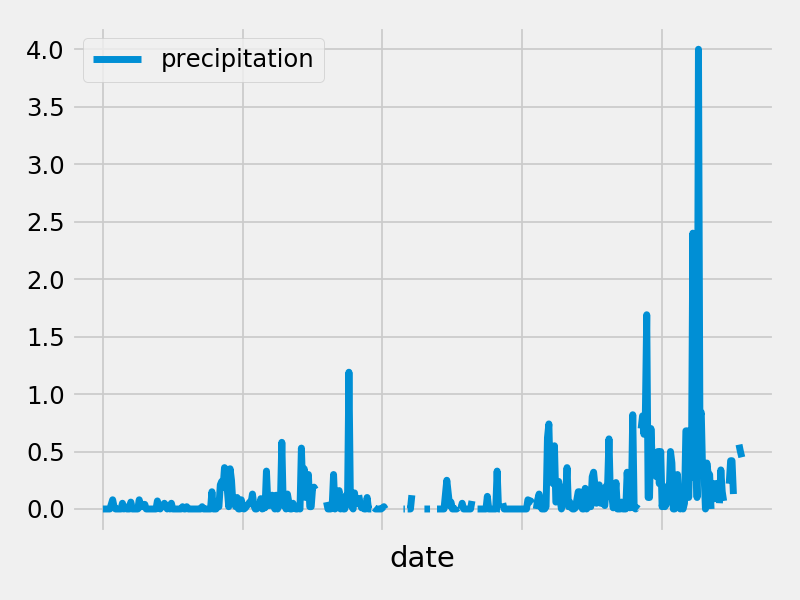

In [10]:
# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates
def showprecipitation():
    measurements_df = precipitation_data()

    measurements_df.plot(kind="line",linewidth=4,figsize=(15,10))

    plt.style.use('fivethirtyeight')

    matplotlib.rcParams.update({'font.size': 16})

    plt.xlabel("Date")
    plt.ylabel("Precipitation")
    plt.title(f"Precipitation analysis of past year")
    plt.xticks(rotation=45)
    plt.legend(["Precipitation"])
    plt.tight_layout()
    plt.savefig("figures/PrecipitationAnalysis_Hawaii.png")

    plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data


precipitation
count     412.000000
mean        0.117549
std         0.294210
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         4.000000

In [12]:
# How many stations are available in this dataset?


[(9)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


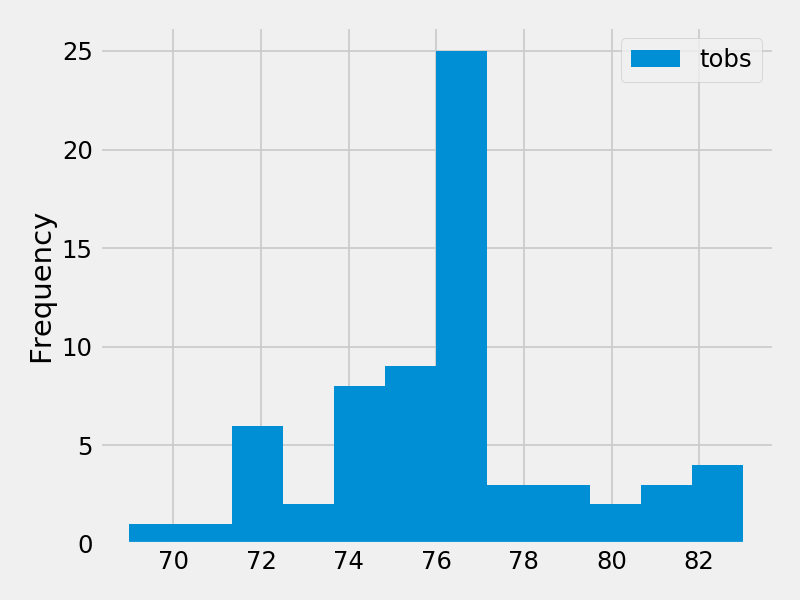

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


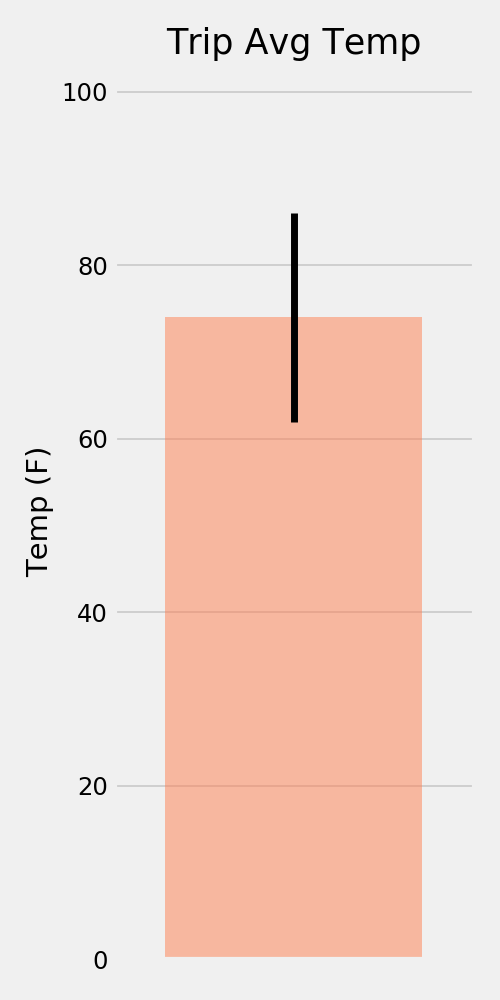

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


tmin       tavg  tmax
date                             
2018-01-01  62.0  69.153846  77.0
2018-01-02  60.0  69.396226  77.0
2018-01-03  62.0  68.909091  77.0
2018-01-04  58.0  70.000000  76.0
2018-01-05  56.0  67.964286  76.0

<IPython.core.display.Javascript object>


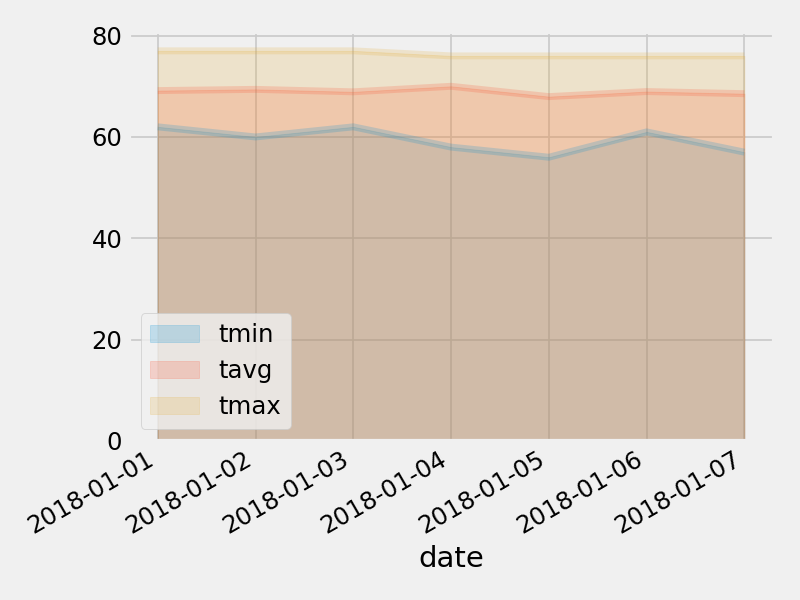

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
